In [1]:
import random
import statistics
import numpy as np
import matplotlib.pyplot as plt
from car import Sim
%matplotlib inline

In [2]:
number_of_cars_desired = 30
run_time_desired = 60
car_top_speed = 33
road_length = 1000
sim = Sim(number_of_cars_desired, run_time_desired, car_top_speed, road_length)

In [3]:
simulation = sim.run_sim()

In [4]:
timeslice_locations = [[x] * number_of_cars_desired for x in range(run_time_desired)]

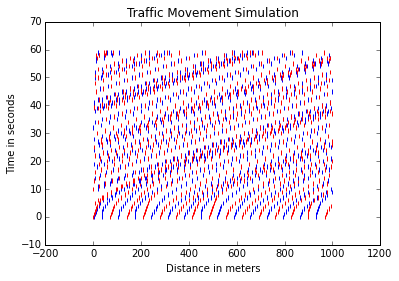

In [5]:
colors = ["red", "blue"]
plt.scatter(simulation[0], timeslice_locations, c=colors, marker="|")
plt.title("Traffic Movement Simulation")
plt.ylabel("Time in seconds")
plt.xlabel("Distance in meters")
plt.show()

This is my traffic simulation.  As you can see, after about 5 seconds, jams occur.  To investigate further, we will need to look at the average speeds.

In [6]:
mean_speeds = []
for speed in simulation[1]:
    time_slot_mean_speeds = statistics.mean(speed)
    mean_speeds.append(time_slot_mean_speeds)   
overall_mean_speed = statistics.mean(mean_speeds)
standard_dev = []
for speed in simulation[1]:
    time_slot_standard_deviation = statistics.stdev(speed)
    standard_dev.append(time_slot_standard_deviation)
overall_deviation = statistics.stdev(standard_dev)
optimal_speed = overall_mean_speed + overall_deviation
print(optimal_speed)

28.323144338351195


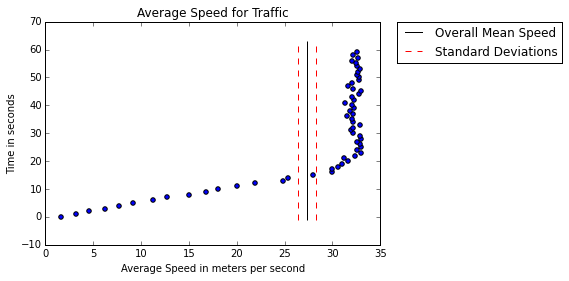

In [7]:
plt.scatter(mean_speeds, range(60))
plt.vlines(overall_mean_speed, ymin=-1, ymax=63, label="Overall Mean Speed")
plt.vlines(overall_mean_speed + overall_deviation, ymin=-1, ymax=63, linestyle='dashed', color='red', label="Standard Deviations")
plt.vlines(overall_mean_speed - overall_deviation, ymin=-1, ymax=63, linestyle='dashed', color='red')
plt.title("Average Speed for Traffic")
plt.xlabel("Average Speed in meters per second")
plt.ylabel("Time in seconds")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

On this graph, you can see the mean speeds at each time interval, as well as the overall mean speed.  While the average speed does seem to level off after a speed of 30 m/s is reached, there still isn't any real consistincey.  Now, we will test our first optimal speed of one standard deviation above the mean (28 m/s).  NOTE: I have rounded the optimal speed down to a whole number for simplicity.

In [14]:
number_of_cars_desired = 30
run_time_desired = 60
car_top_speed = 28
road_length = 1000
sim2 = Sim(number_of_cars_desired, run_time_desired, car_top_speed, road_length)

In [15]:
simulation2 = sim2.run_sim()

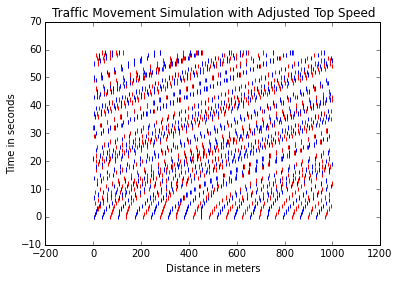

In [16]:
colors = ["red", "blue"]
plt.scatter(simulation2[0], timeslice_locations, c=colors, marker="|")
plt.title("Traffic Movement Simulation with Adjusted Top Speed")
plt.ylabel("Time in seconds")
plt.xlabel("Distance in meters")
plt.show()

This result surprised me.  I expected a lot less jams, but there seem to be more jams.  I will now plot the mean speeds for this iteration of the experiment to investigate further.

In [17]:
mean_speeds2 = []
for speed in simulation2[1]:
    time_slot_mean_speeds2 = statistics.mean(speed)
    mean_speeds2.append(time_slot_mean_speeds2)   
overall_mean_speed2 = statistics.mean(mean_speeds2)
standard_dev2 = []
for speed in simulation2[1]:
    time_slot_standard_deviation2 = statistics.stdev(speed)
    standard_dev2.append(time_slot_standard_deviation2)
overall_deviation2 = statistics.stdev(standard_dev2)
optimal_speed2 = overall_mean_speed2 + overall_deviation2
print(optimal_speed2)

24.548526185729383


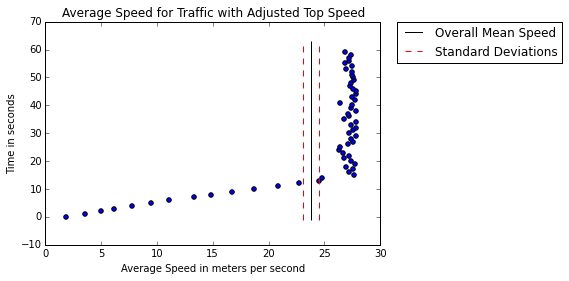

In [19]:
plt.scatter(mean_speeds2, range(60))
plt.vlines(overall_mean_speed2, ymin=-1, ymax=63, label="Overall Mean Speed")
plt.vlines(overall_mean_speed2 + overall_deviation2, ymin=-1, ymax=63, linestyle='dashed', color='red', label="Standard Deviations")
plt.vlines(overall_mean_speed2 - overall_deviation2, ymin=-1, ymax=63, linestyle='dashed', color='red')
plt.title("Average Speed for Traffic with Adjusted Top Speed")
plt.xlabel("Average Speed in meters per second")
plt.ylabel("Time in seconds")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

The overall mean speed has been lowered to around 24 m/s, down from around 27 m/s, but you can see the the speeds do not level out until about 50 seconds into the test.  Also, this leveling out is very brief.  Due to these facts, I do not beleive I have found the optimal top speed yet.  I will try these tests again with the car's top speed set at 25 m/s.  

In [20]:
number_of_cars_desired = 30
run_time_desired = 60
car_top_speed = 25
road_length = 1000
sim3 = Sim(number_of_cars_desired, run_time_desired, car_top_speed, road_length)
simulation3 = sim3.run_sim()

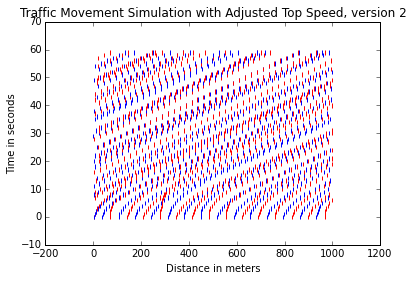

In [21]:
colors = ["red", "blue"]
plt.scatter(simulation3[0], timeslice_locations, c=colors, marker="|")
plt.title("Traffic Movement Simulation with Adjusted Top Speed, version 2")
plt.ylabel("Time in seconds")
plt.xlabel("Distance in meters")
plt.show()

Now, traffic seems to be moving at a more uniform pace.  While there are a few areas that could qualify as jams, they are nothing compared to the first iteration of the test.  I will plot the average speeds to see if this hypothesis is correct.

22.577887862759294


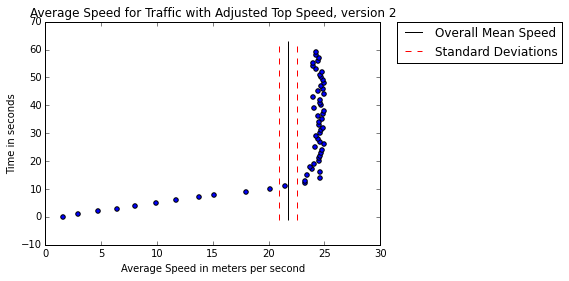

In [22]:
mean_speeds3 = []
for speed in simulation3[1]:
    time_slot_mean_speeds3 = statistics.mean(speed)
    mean_speeds3.append(time_slot_mean_speeds3)   
overall_mean_speed3 = statistics.mean(mean_speeds3)
standard_dev3 = []
for speed in simulation3[1]:
    time_slot_standard_deviation3 = statistics.stdev(speed)
    standard_dev3.append(time_slot_standard_deviation3)
overall_deviation3 = statistics.stdev(standard_dev3)
optimal_speed3 = overall_mean_speed3 + overall_deviation3
print(optimal_speed3)

plt.scatter(mean_speeds3, range(60))
plt.vlines(overall_mean_speed3, ymin=-1, ymax=63, label="Overall Mean Speed")
plt.vlines(overall_mean_speed3 + overall_deviation3, ymin=-1, ymax=63, linestyle='dashed', color='red', label="Standard Deviations")
plt.vlines(overall_mean_speed3 - overall_deviation3, ymin=-1, ymax=63, linestyle='dashed', color='red')
plt.title("Average Speed for Traffic with Adjusted Top Speed, version 2")
plt.xlabel("Average Speed in meters per second")
plt.ylabel("Time in seconds")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

While my hypothesis from the previous graph isn't totally confirmed, I am closing in on the optimal cruising speed.  There is very little fluctuation in the average speeds after passing the overall average speed, there is still some fluctuation.  I will run another test, setting the top speed at 23 m/s.

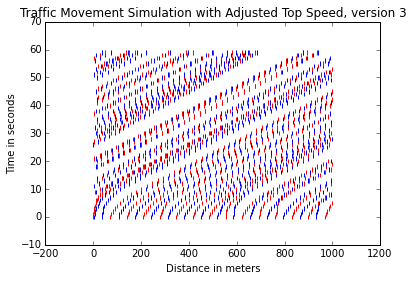

20.815610414019464


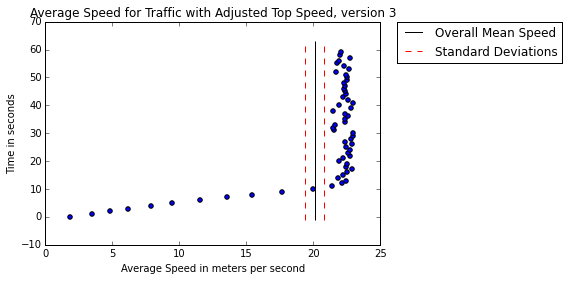

In [23]:
number_of_cars_desired = 30
run_time_desired = 60
car_top_speed = 23
road_length = 1000
sim4 = Sim(number_of_cars_desired, run_time_desired, car_top_speed, road_length)
simulation4 = sim4.run_sim()

colors = ["red", "blue"]
plt.scatter(simulation4[0], timeslice_locations, c=colors, marker="|")
plt.title("Traffic Movement Simulation with Adjusted Top Speed, version 3")
plt.ylabel("Time in seconds")
plt.xlabel("Distance in meters")
plt.show()

mean_speeds4 = []
for speed in simulation4[1]:
    time_slot_mean_speeds4 = statistics.mean(speed)
    mean_speeds4.append(time_slot_mean_speeds4)   
overall_mean_speed4 = statistics.mean(mean_speeds4)
standard_dev4 = []
for speed in simulation4[1]:
    time_slot_standard_deviation4 = statistics.stdev(speed)
    standard_dev4.append(time_slot_standard_deviation4)
overall_deviation4 = statistics.stdev(standard_dev4)
optimal_speed4 = overall_mean_speed4 + overall_deviation4
print(optimal_speed4)

plt.scatter(mean_speeds4, range(60))
plt.vlines(overall_mean_speed4, ymin=-1, ymax=63, label="Overall Mean Speed")
plt.vlines(overall_mean_speed4 + overall_deviation4, ymin=-1, ymax=63, linestyle='dashed', color='red', label="Standard Deviations")
plt.vlines(overall_mean_speed4 - overall_deviation4, ymin=-1, ymax=63, linestyle='dashed', color='red')
plt.title("Average Speed for Traffic with Adjusted Top Speed, version 3")
plt.xlabel("Average Speed in meters per second")
plt.ylabel("Time in seconds")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

This test was disappointing.  I thought I was closing in on the optimal speed, but there is more fluctuation in the top speeds in this test than there was in version 2.  I will run the test again with the optimal speed at 21 m/s.

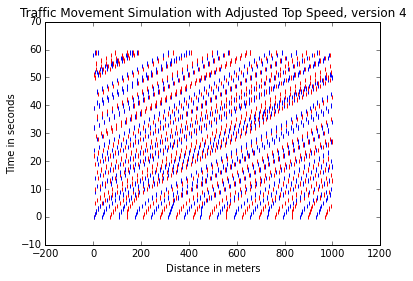

20.640398081275812


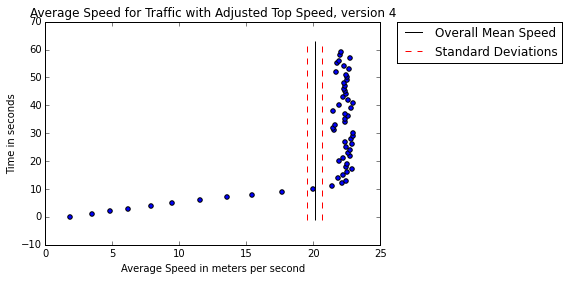

In [24]:
number_of_cars_desired = 30
run_time_desired = 60
car_top_speed = 21
road_length = 1000
sim5 = Sim(number_of_cars_desired, run_time_desired, car_top_speed, road_length)
simulation5 = sim5.run_sim()

colors = ["red", "blue"]
plt.scatter(simulation5[0], timeslice_locations, c=colors, marker="|")
plt.title("Traffic Movement Simulation with Adjusted Top Speed, version 4")
plt.ylabel("Time in seconds")
plt.xlabel("Distance in meters")
plt.show()

mean_speeds5 = []
for speed in simulation4[1]:
    time_slot_mean_speeds5 = statistics.mean(speed)
    mean_speeds5.append(time_slot_mean_speeds5)   
overall_mean_speed5 = statistics.mean(mean_speeds5)
standard_dev5 = []
for speed in simulation5[1]:
    time_slot_standard_deviation5 = statistics.stdev(speed)
    standard_dev5.append(time_slot_standard_deviation5)
overall_deviation5 = statistics.stdev(standard_dev5)
optimal_speed5 = overall_mean_speed5 + overall_deviation5
print(optimal_speed5)

plt.scatter(mean_speeds5, range(60))
plt.vlines(overall_mean_speed5, ymin=-1, ymax=63, label="Overall Mean Speed")
plt.vlines(overall_mean_speed5 + overall_deviation5, ymin=-1, ymax=63, linestyle='dashed', color='red', label="Standard Deviations")
plt.vlines(overall_mean_speed5 - overall_deviation5, ymin=-1, ymax=63, linestyle='dashed', color='red')
plt.title("Average Speed for Traffic with Adjusted Top Speed, version 4")
plt.xlabel("Average Speed in meters per second")
plt.ylabel("Time in seconds")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

I have found the optimal cruising speed.  While there is still some fluctuation in the average speed, the pattern in the traffic simulation graph is more consistent than any of the others.  While I could continue testing until there is almost no fluctuation in the average speeds, the actual speed would be too low to be a realistic representation of traffic flow.  With that being true, I conclude that the optimal crusing speed is 21 m/s or 